In [1]:
import keras
keras.__version__

/usr/lib64/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [3]:
original_dataset_dir = './datasets/cats_and_dogs/train'

In [7]:
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

In [8]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [9]:
# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [10]:
# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

훈련용 고양이 이미지 전체 개수: 1000


In [12]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [13]:
from keras import layers
from keras import models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
from keras import optimizers

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape, data_batch[0, :,:,:])
    print('배치 레이블 크기:', labels_batch.shape, labels_batch[0])
    break

배치 데이터 크기: (20, 150, 150, 3) [[[0.12156864 0.10588236 0.0627451 ]
  [0.12156864 0.09411766 0.07058824]
  [0.13333334 0.09803922 0.07058824]
  ...
  [0.2392157  0.18039216 0.09019608]
  [0.227451   0.18039216 0.09411766]
  [0.21176472 0.16862746 0.08235294]]

 [[0.12156864 0.10588236 0.0627451 ]
  [0.1254902  0.09803922 0.07450981]
  [0.14117648 0.10588236 0.07843138]
  ...
  [0.2392157  0.18039216 0.09019608]
  [0.227451   0.18039216 0.09411766]
  [0.21568629 0.17254902 0.08627451]]

 [[0.12156864 0.10588236 0.0627451 ]
  [0.13725491 0.10980393 0.08627451]
  [0.15294118 0.11764707 0.09019608]
  ...
  [0.2392157  0.18039216 0.09019608]
  [0.227451   0.18039216 0.09411766]
  [0.227451   0.18039216 0.08627451]]

 ...

 [[0.13725491 0.13333334 0.11764707]
  [0.1137255  0.10980393 0.09411766]
  [0.1137255  0.10980393 0.09411766]
  ...
  [0.11764707 0.17254902 0.22352943]
  [0.10588236 0.16078432 0.20392159]
  [0.10196079 0.15294118 0.18823531]]

 [[0.13725491 0.13333334 0.11764707]
  [0.105

In [27]:
'''
제너레이터로부터 steps_per_epoch 개의 배치만큼 뽑은 다음, 
즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행한 다음에 
훈련 프로세스는 다음 에포크로 넘어갑니다. 
여기서는 20개의 샘플이 하나의 배치이므로 
2,000개의 샘플을 모두 처리할 때까지 
100개의 배치를 뽑을 것입니다.
'''

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 145ms/step - loss: 0.6870 - acc: 0.5400 - val_loss: 0.6813 - val_acc: 0.5180
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6505 - acc: 0.6230 - val_loss: 0.6478 - val_acc: 0.6080
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5956 - acc: 0.6840 - val_loss: 0.5888 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5545 - acc: 0.7185 - val_loss: 0.6049 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 9s 87ms/step - loss: 0.5287 - acc: 0.7290 - val_loss: 0.5930 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 8s 84ms/step - loss: 0.5077 - acc: 0.7460 - val_loss: 0.5855 - val_acc: 0.6940
Epoch 7/30
100/100 [==============================] - 9s 88ms/step - loss: 0.4789 - acc: 0.7680 - val_loss: 0.6204 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 9s 90ms/step 

In [28]:
model.save('./models/cats_and_dogs_small_1.h5')

In [29]:
import matplotlib.pyplot as plt

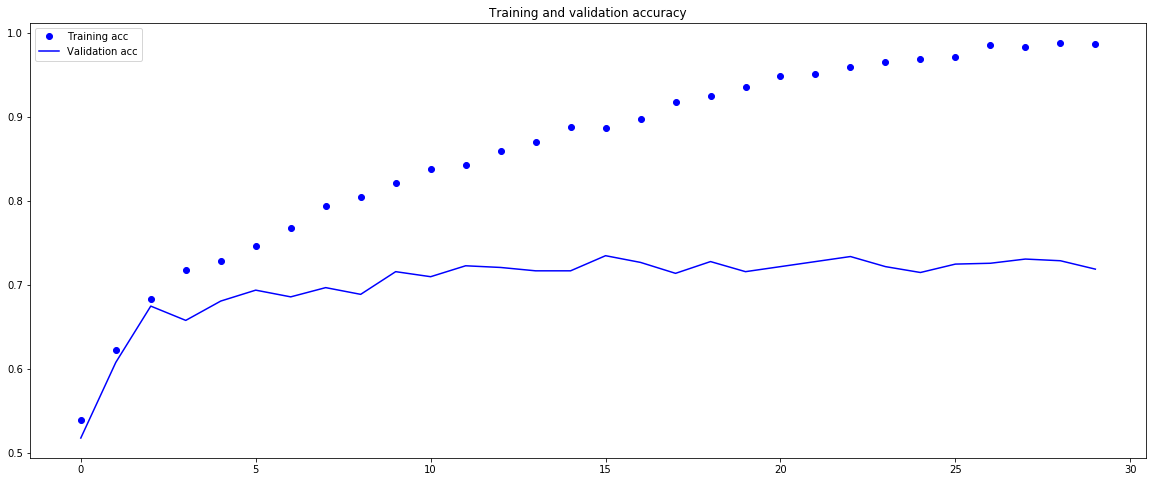

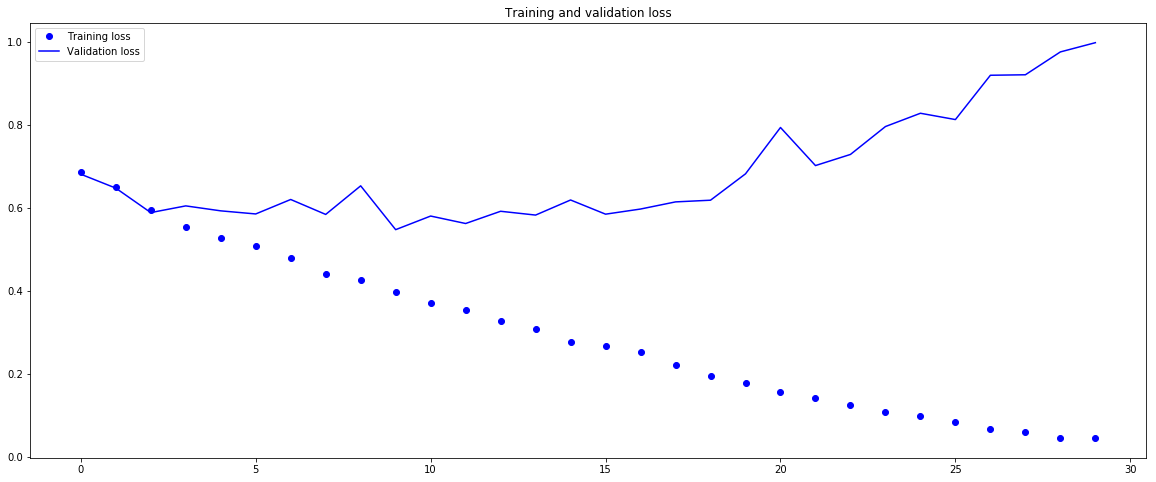

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [35]:
from keras.preprocessing import image

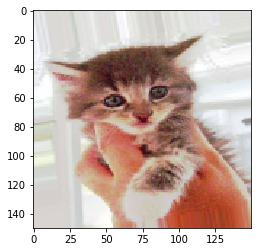

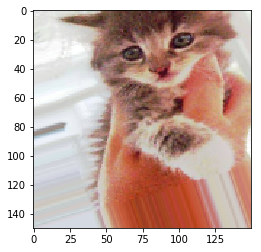

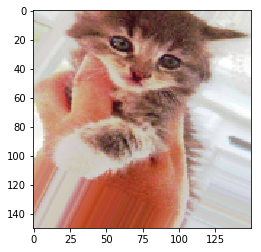

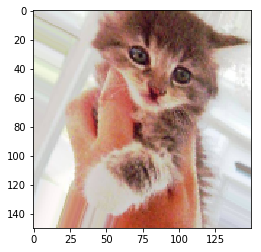

In [36]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)


In [39]:
train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=32)

Epoch 1/100
100/100 [==============================] - 33s 334ms/step - loss: 0.6943 - acc: 0.5103 - val_loss: 0.6815 - val_acc: 0.6170
Epoch 2/100
100/100 [==============================] - 31s 313ms/step - loss: 0.6785 - acc: 0.5656 - val_loss: 0.6599 - val_acc: 0.5880
Epoch 3/100
100/100 [==============================] - 31s 313ms/step - loss: 0.6715 - acc: 0.5778 - val_loss: 0.6855 - val_acc: 0.5320
Epoch 4/100
100/100 [==============================] - 32s 323ms/step - loss: 0.6530 - acc: 0.6059 - val_loss: 0.6442 - val_acc: 0.6150
Epoch 5/100
100/100 [==============================] - 33s 325ms/step - loss: 0.6340 - acc: 0.6394 - val_loss: 0.6429 - val_acc: 0.6000
Epoch 6/100
100/100 [==============================] - 32s 323ms/step - loss: 0.6248 - acc: 0.6559 - val_loss: 0.7354 - val_acc: 0.5750
Epoch 7/100
100/100 [==============================] - 32s 324ms/step - loss: 0.6054 - acc: 0.6694 - val_loss: 0.5777 - val_acc: 0.6800
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 31s 308ms/step - loss: 0.4154 - acc: 0.8150 - val_loss: 0.4321 - val_acc: 0.8180
Epoch 62/100
100/100 [==============================] - 30s 304ms/step - loss: 0.4160 - acc: 0.8062 - val_loss: 0.4621 - val_acc: 0.8010
Epoch 63/100
100/100 [==============================] - 31s 307ms/step - loss: 0.4057 - acc: 0.8150 - val_loss: 0.5371 - val_acc: 0.7410
Epoch 64/100
100/100 [==============================] - 31s 308ms/step - loss: 0.3987 - acc: 0.8175 - val_loss: 0.4230 - val_acc: 0.8030
Epoch 65/100
100/100 [==============================] - 31s 308ms/step - loss: 0.4047 - acc: 0.8144 - val_loss: 0.4426 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 31s 308ms/step - loss: 0.4198 - acc: 0.8097 - val_loss: 0.4707 - val_acc: 0.7990
Epoch 67/100
100/100 [==============================] - 31s 308ms/step - loss: 0.4004 - acc: 0.8175 - val_loss: 0.4531 - val_acc: 0.7960
Epoch 68/100
100/100 [===================

In [41]:
model.save('./models/cats_and_dogs_small_2.h5')

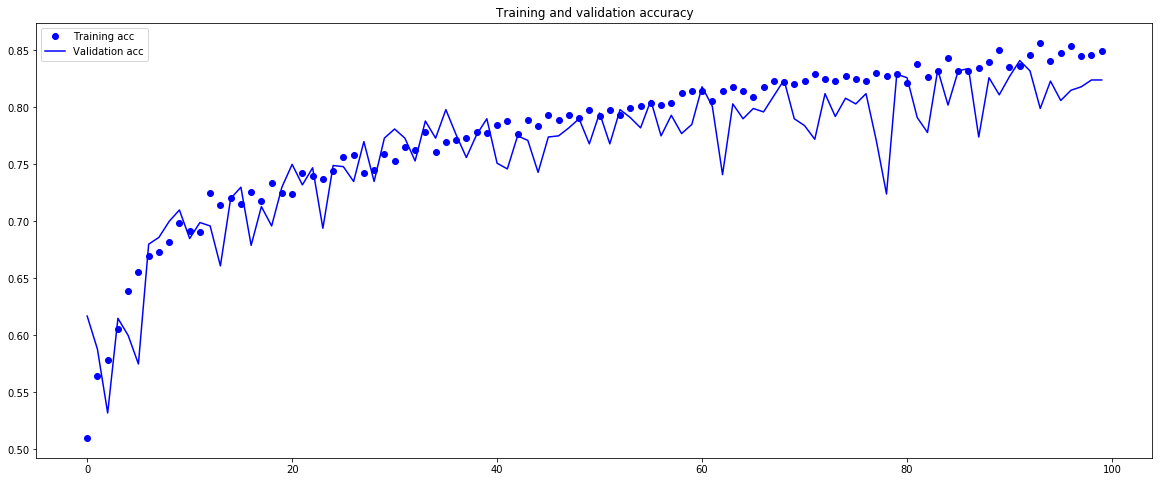

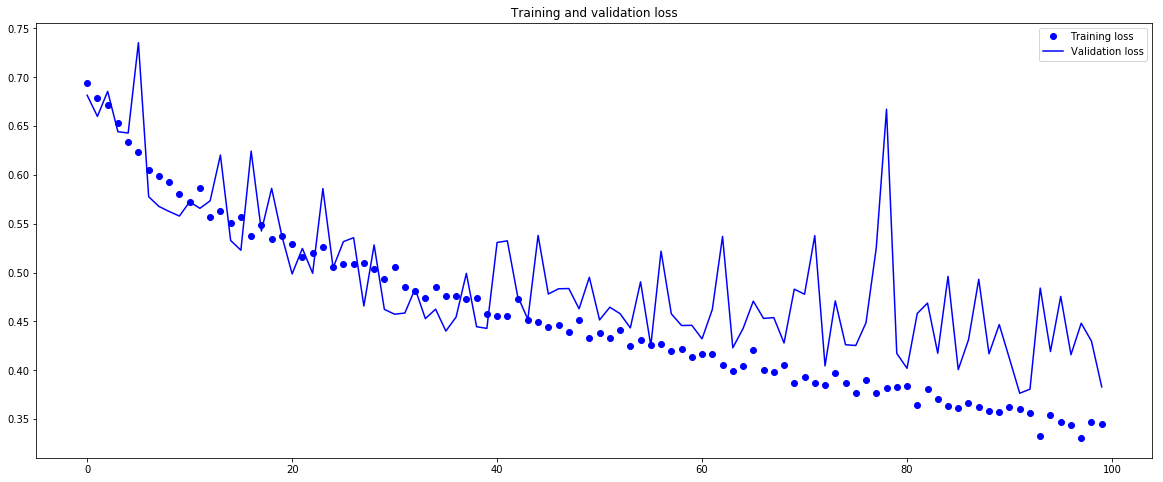

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(20, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(20, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()